In [1]:
import pandas as pd

# find cities and regions by ip address

In [5]:
data = pd.read_csv('/home/respeli/khishavere/khishavere_data_export_980431/csv_format/action_logs.csv')
data = data.drop(columns = ['id','url','controller','content','created_at','action'])

In [7]:
d1 = data.drop_duplicates(subset = 'user_id' ,keep = 'first')
d1 = d1.rename(columns={'ip':'IP'})
ips = d1['IP']
ips = list(dict.fromkeys(ips))

In [8]:
co ,ci ,re = [] ,[] ,[]

import IP2Location

IP2LocObj = IP2Location.IP2Location()
IP2LocObj.open("/home/respeli/khishavere/IP2LOCATION-LITE-DB3.BIN")


for i in ips:
    rec = IP2LocObj.get_all(i)
    co.append(rec.country_short)
    ci.append(rec.city)
    re.append(rec.region)

In [11]:
d2 = pd.DataFrame()
d2['IP'] = ips
d2['country'] = co
d2['region'] = re
d2['city'] = ci


creat a table for Geographical Distribution

In [15]:
geo = pd.merge(left = d1,right = d2,on=['IP'],how='outer')
geo.to_csv('Geo.csv')

 conection from iran 

In [16]:
d3 = d2[d2['country'] == b'IR']

c ,r = [] ,[]
cities = list(dict.fromkeys(d3['city']))
region = list(dict.fromkeys(d3['region']))

for i in citis:
    c.append(len(d3[d3['city'] == i]))
for i in region:
    r.append(len(d3[d3['region'] == i]))

## visualise

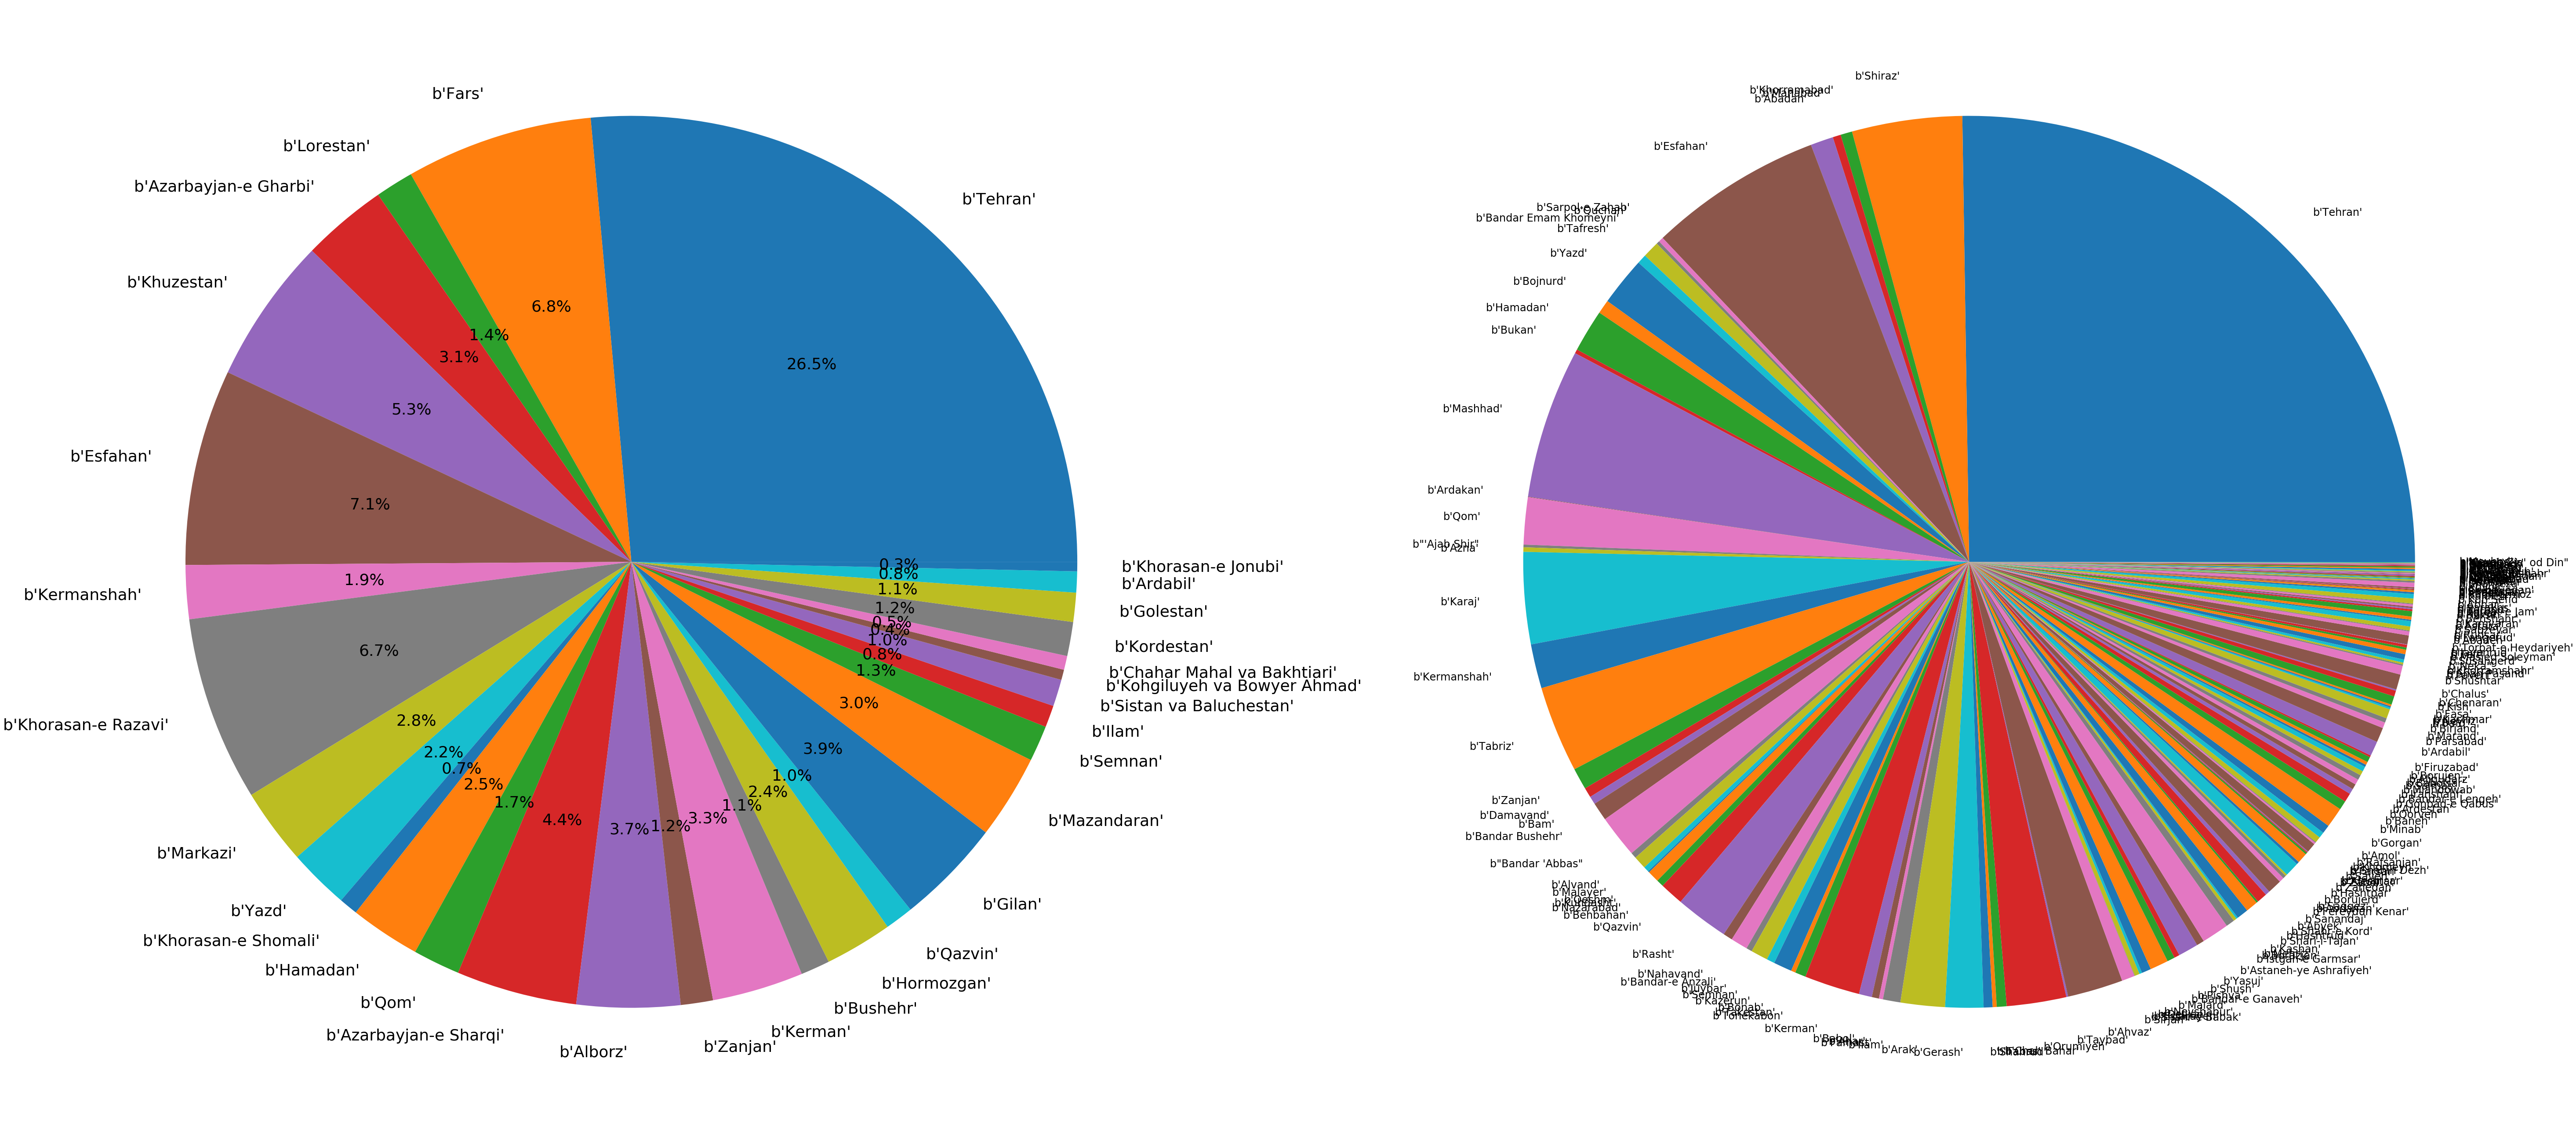

In [26]:
import matplotlib.pyplot as plt

fig, (ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(100, 100)
ax1.pie(r, labels = region, autopct='%1.1f%%', textprops={'fontsize': 36})
ax2.pie(c, labels = citis, textprops={'fontsize': 24})
plt.show()
